In [2]:
pip install matplotlib

**Weather Prediction Model for London’s Daily Mean Temperature (1979-2023)**

**Overview Of Problem Statement:-**

This project aims to develop a weather prediction model for London's daily mean temperature (TG) using a regression model. The model will analyze historical weather data from 1979 to 2023 to identify patterns and relationships between temperature and other weather variables. The goal is to build an accurate regression model capable of predicting future temperature trends and assisting in weather forecasting and climate analysis.

**Objective:-**

To develop a regression model to accurately predict London's daily mean temperature (TG) based on historical weather data from 1979 to 2023. The project aims to analyze the relationship between temperature and various weather variables, such as humidity, air pressure, and other factors, to build a robust model. By leveraging regression techniques, the model will forecast future temperature trends and provide insights into long-term weather patterns. The overall goal is to create a reliable tool for weather prediction and contribute to climate studies through data-driven analysis.

**Data Description:-**

**1. Source Of Data: Kaggle**

**Features:-**

**DATE:** Observation date

**TX :** Maximum temperature



**Q_TX:** Quality flag for maximum temperature

**TN :** Minimum temperature

**Q_TN:** Quality flag for minimum temperature



**TG :** Mean temperature

**Q_TG:** Quality flag for mean temperaure

**SS :** Sunshine duration

**Q_SS:** Quality flag for sunshine duration

**SD :** Snow depth

**Q_SD:** Quality flag for snow depth

**RR :** Precipitation amount

**Q_RR:** Quality flag for precipitation

**QQ :** Global radiation

**Q_QQ:** Quality flag for global radiation

**PP :** Atmospheric pressure

**Q_PP:** Quality flag for atmospheric pressure

**HU :** Relative humidity

**Q_HU:** Quality flag for relative humidity

**CC :** Cloud cover

**Q_CC:** Quality flag for cloud cover

**Shape Of the Dataset:** (16436 rows × 21 columns)

1. These columns likely represent meteorological or climate data measurements

2. Quality flags typically indicate data reliability or any detected anomalies

**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from joblib import dump
from joblib import load
import joblib
import warnings
warnings.filterwarnings('ignore')


**Data Collection**

In [4]:
df = pd.read_csv("/content/london_weather_data_1979_to_2023.csv")
df

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,0,55.0,0,89.0,0,0.0,0,0.0,...,46.0,0,12.0,0,10067.0,0,89.0,0,8.0,0
16432,20231228,119.0,0,97.0,0,112.0,0,2.0,0,0.0,...,48.0,0,15.0,0,10051.0,0,81.0,0,7.0,0
16433,20231229,122.0,0,92.0,0,106.0,0,7.0,0,0.0,...,0.0,0,20.0,0,10071.0,0,78.0,0,6.0,0
16434,20231230,107.0,0,56.0,0,89.0,0,0.0,0,0.0,...,56.0,0,12.0,0,10046.0,0,87.0,0,7.0,0


In [5]:
df.head()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0


In [6]:
df.dtypes

,0
DATE,int64
TX,float64
Q_TX,int64
TN,float64
Q_TN,int64
TG,float64
Q_TG,int64
SS,float64
Q_SS,int64
SD,float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16436 non-null  int64  
 1   TX      16436 non-null  float64
 2   Q_TX    16436 non-null  int64  
 3   TN      16436 non-null  float64
 4   Q_TN    16436 non-null  int64  
 5   TG      16407 non-null  float64
 6   Q_TG    16436 non-null  int64  
 7   SS      16436 non-null  float64
 8   Q_SS    16436 non-null  int64  
 9   SD      15361 non-null  float64
 10  Q_SD    16436 non-null  int64  
 11  RR      16436 non-null  float64
 12  Q_RR    16436 non-null  int64  
 13  QQ      16411 non-null  float64
 14  Q_QQ    16436 non-null  int64  
 15  PP      16432 non-null  float64
 16  Q_PP    16436 non-null  int64  
 17  HU      16379 non-null  float64
 18  Q_HU    16436 non-null  int64  
 19  CC      16418 non-null  float64
 20  Q_CC    16436 non-null  int64  
dtypes: float64(10), int64(11)
memory us

In [8]:
df.describe()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
count,1.643600e+04,16436.000000,16436.000000,16436.000000,16436.000000,16407.000000,16436.000000,16436.000000,16436.0,15361.000000,...,16436.000000,16436.0,16411.00000,16436.000000,16432.000000,16436.00000,16379.000000,16436.000000,16418.000000,16436.000000
mean,2.001066e+07,154.686846,0.068082,76.016427,0.015454,115.373316,0.083962,43.153626,0.0,0.034633,...,16.791738,0.0,119.52020,0.017036,10153.889423,0.00219,76.283717,0.031212,5.256426,0.009978
std,1.298742e+05,65.741246,0.251895,53.392049,0.123353,57.457444,0.451623,39.992648,0.0,0.519639,...,37.614507,0.0,89.26958,0.355343,105.196268,0.14039,10.520699,0.529104,2.091593,0.297885
min,1.979010e+07,-62.000000,0.000000,-118.000000,0.000000,-76.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,9596.000000,0.00000,33.000000,0.000000,0.000000,0.000000
25%,1.990040e+07,106.000000,0.000000,36.000000,0.000000,72.000000,0.000000,4.000000,0.0,0.000000,...,0.000000,0.0,42.00000,0.000000,10091.000000,0.00000,69.000000,0.000000,4.000000,0.000000
50%,2.001070e+07,151.000000,0.000000,78.000000,0.000000,114.000000,0.000000,35.000000,0.0,0.000000,...,0.000000,0.0,96.00000,0.000000,10162.000000,0.00000,77.000000,0.000000,6.000000,0.000000
75%,2.012095e+07,204.000000,0.000000,118.000000,0.000000,161.000000,0.000000,71.000000,0.0,0.000000,...,16.000000,0.0,187.00000,0.000000,10225.000000,0.00000,84.000000,0.000000,7.000000,0.000000
max,2.023123e+07,402.000000,1.000000,223.000000,1.000000,309.000000,9.000000,157.000000,0.0,22.000000,...,618.000000,0.0,402.00000,9.000000,10477.000000,9.00000,100.000000,9.000000,9.000000,9.000000


**Data Preprocessing**

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

,0
DATE,0
TX,0
Q_TX,0
TN,0
Q_TN,0
TG,29
Q_TG,0
SS,0
Q_SS,0
SD,1075


In [11]:
#removing null values
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
DATE,0
TX,0
Q_TX,0
TN,0
Q_TN,0
TG,0
Q_TG,0
SS,0
Q_SS,0
SD,0


In [13]:
df.shape

(15264, 21)

In [14]:
df.dtypes

,0
DATE,int64
TX,float64
Q_TX,int64
TN,float64
Q_TN,int64
TG,float64
Q_TG,int64
SS,float64
Q_SS,int64
SD,float64


Note: Some of the values in the dataset are represented in a 0-1 format, which do not indicate true outliers. As a result, certain columns were dropped to improve the quality of the data for modeling.

**Columns Selected for Outlier Treatment**

In [15]:
#specifying columns to fix outliers
col_to_fix_outliers =['TX','TN','TG','SS','RR','QQ','PP','HU','CC']


In [16]:
df.columns

Index(['DATE', 'TX', 'Q_TX', 'TN', 'Q_TN', 'TG', 'Q_TG', 'SS', 'Q_SS', 'SD',
       'Q_SD', 'RR', 'Q_RR', 'QQ', 'Q_QQ', 'PP', 'Q_PP', 'HU', 'Q_HU', 'CC',
       'Q_CC'],
      dtype='object')

**Visualizing Outliers Using Boxplot**

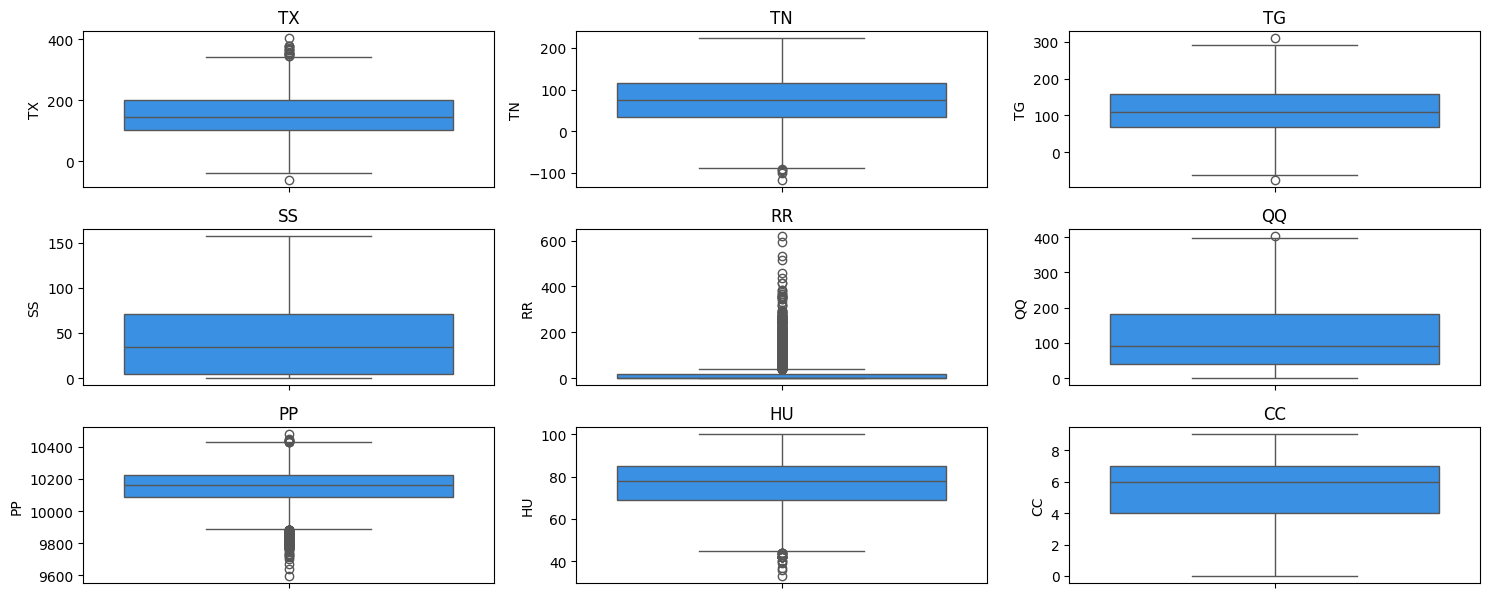

In [17]:
#visualizing outliers using boxplot
plt.figure(figsize=(15,10))
for i,col in enumerate(col_to_fix_outliers):
    plt.subplot(5,3,i+1)
    sns.boxplot(y=df[col], color='dodgerblue')
    plt.title(col)
plt.tight_layout()
plt.show()

**Note:** Outliers in the 'SD' column are not fixed, assuming minimal impact on the target variable 'TG' based on relevance and data analysis.

**Fixing Outliers Using IQR Method**


In [18]:
#fixing outliers
for col in col_to_fix_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Capping
    df[col] = np.where(df[col]<lower_bound,lower_bound,df[col])
    df[col] = np.where(df[col]>upper_bound,upper_bound,df[col])

**Visualization after Fixing Outliers**

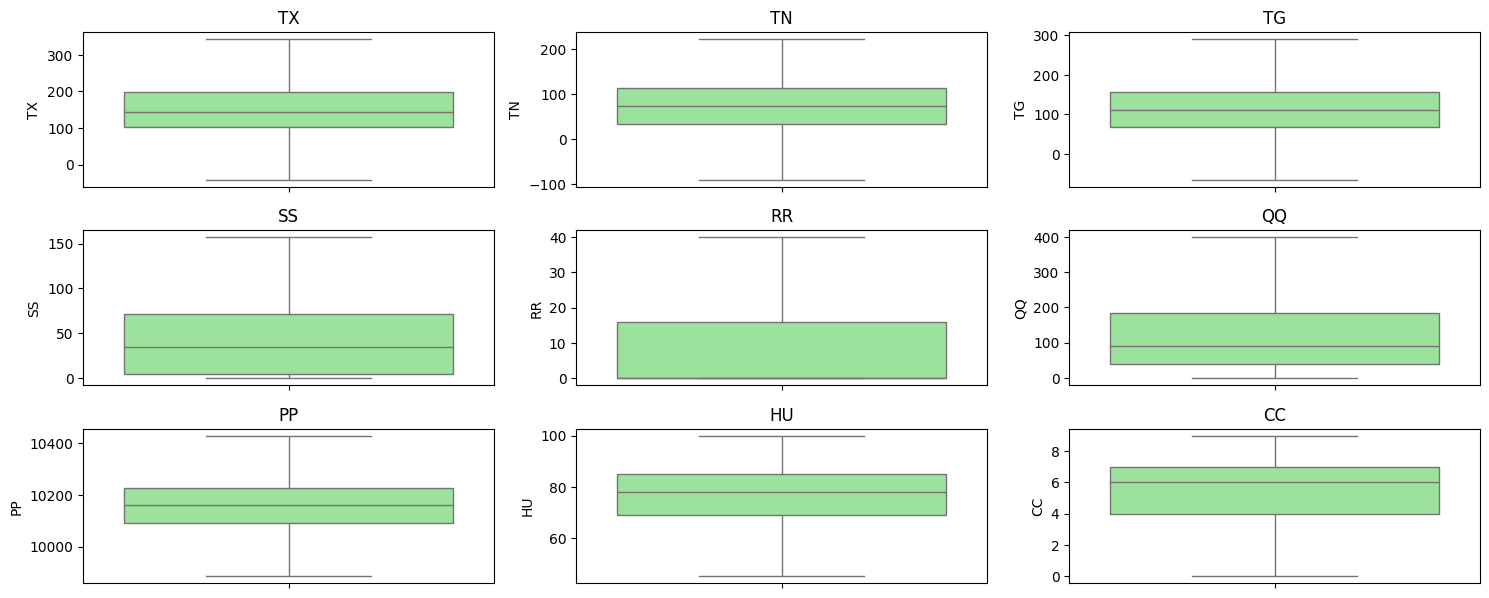

In [19]:
# Visualizing Outliers After fixing by IQR Method
plt.figure(figsize=(15,10))
for i,col in enumerate(col_to_fix_outliers):
    plt.subplot(5,3,i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()


**Checking Skew**

In [20]:
#checking Skewness
df[col_to_fix_outliers].skew()

,0
TX,0.195376
TN,-0.106950
TG,0.065281
SS,0.707787
RR,1.235402
QQ,0.707593
PP,-0.309526
HU,-0.360000
CC,-0.711274


**Fixing Skew**

In [21]:
#fixing skewness using log & Yeo-Shonson Method
pt = PowerTransformer(method='yeo-johnson')
df['RR'] = np.log(df['RR']+1)
df['SS'] = np.sqrt(df['SS']+1)
df['QQ'] = np.sqrt(df['QQ']+1)
df['CC'] = pt.fit_transform(df[['CC']])


**Checking Skew after Fixing**

In [22]:
#checking skew after fixing
df[col_to_fix_outliers].skew()

,0
TX,0.195376
TN,-0.106950
TG,0.065281
SS,0.018680
RR,0.600594
QQ,0.206754
PP,-0.309526
HU,-0.360000
CC,-0.286443


<Axes: ylabel='Density'>

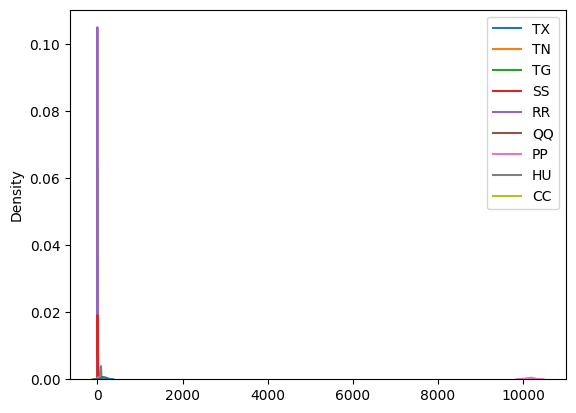

In [23]:
#checking skew visualizing
sns.kdeplot(df[col_to_fix_outliers])

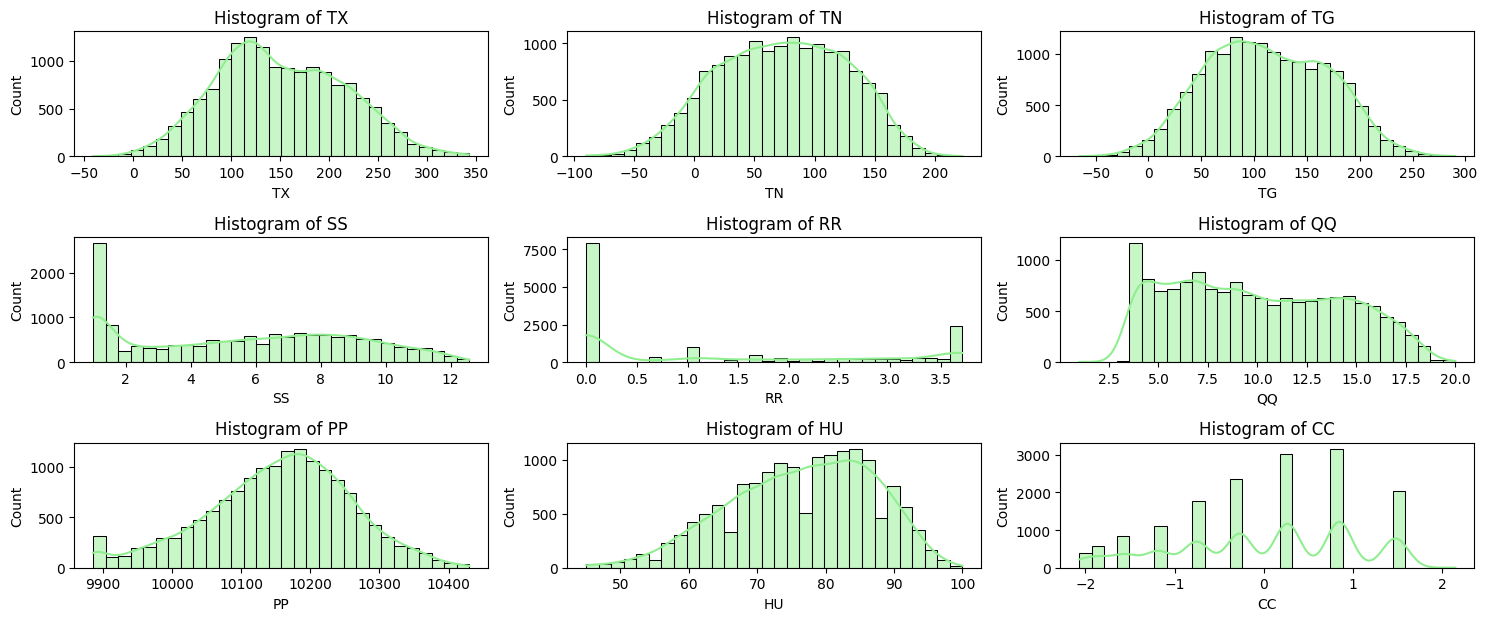

In [24]:
#visualizing skewness & outliers in Data Features
plt.figure(figsize=(15,10))
for i,col in enumerate(col_to_fix_outliers):
    plt.subplot(5,3,i+1)
    sns.histplot(df[col],kde=True,color='lightgreen',edgecolor='black',bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()



**Exploratory Data Analysis (EDA)**

In [25]:
num_col = df.select_dtypes(include='number')

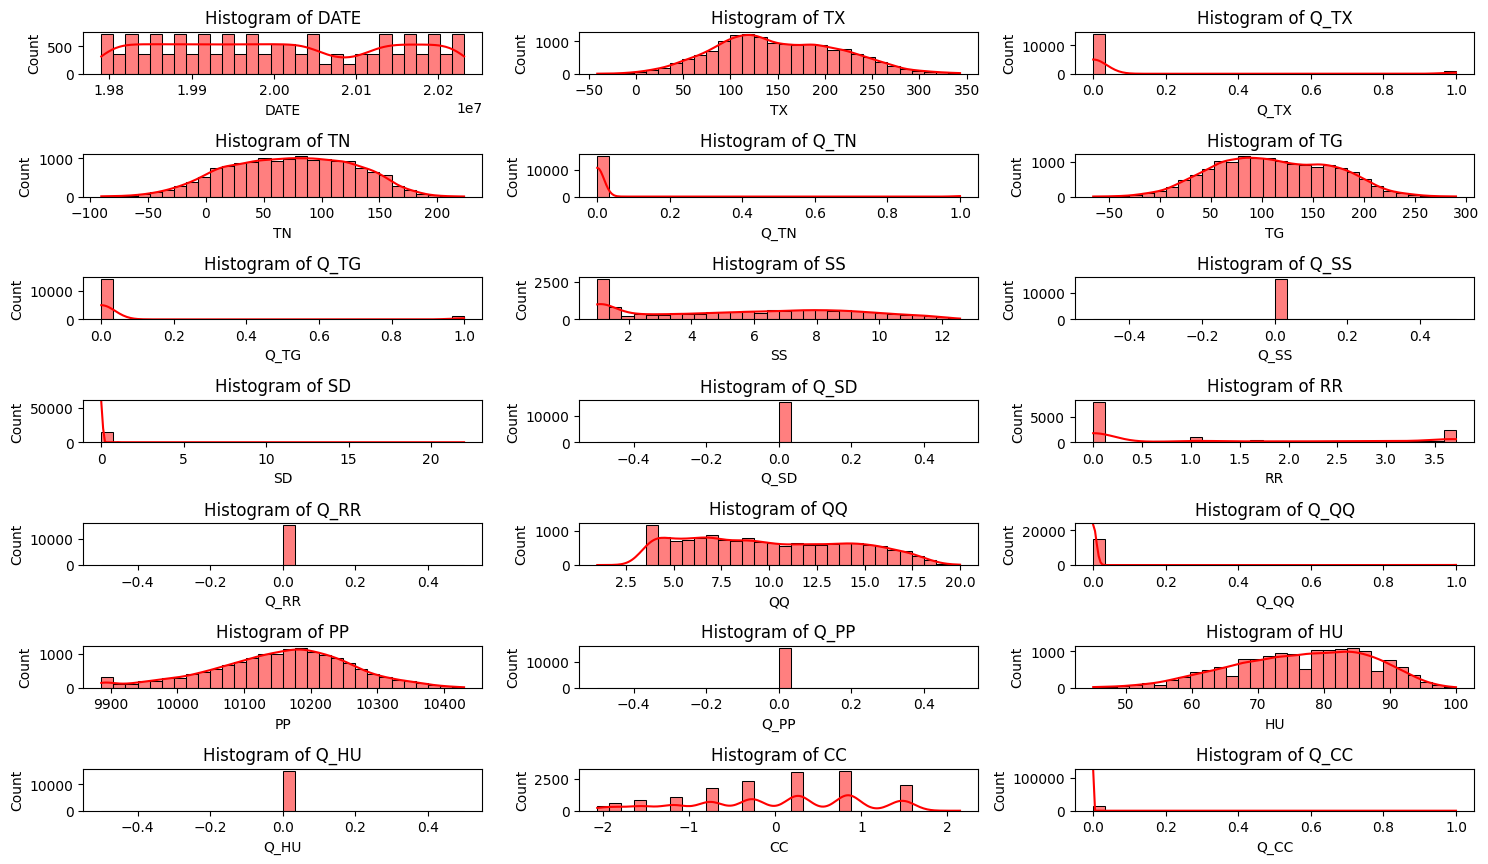

In [26]:
#Visualizing Distribution Of Numerical Features With Histogram & KDE
plt.figure(figsize=(15,12))
for i,col in enumerate(num_col,1):
    plt.subplot(10,3,i)
    sns.histplot(df[col],kde=True,color='red',edgecolor='black',bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

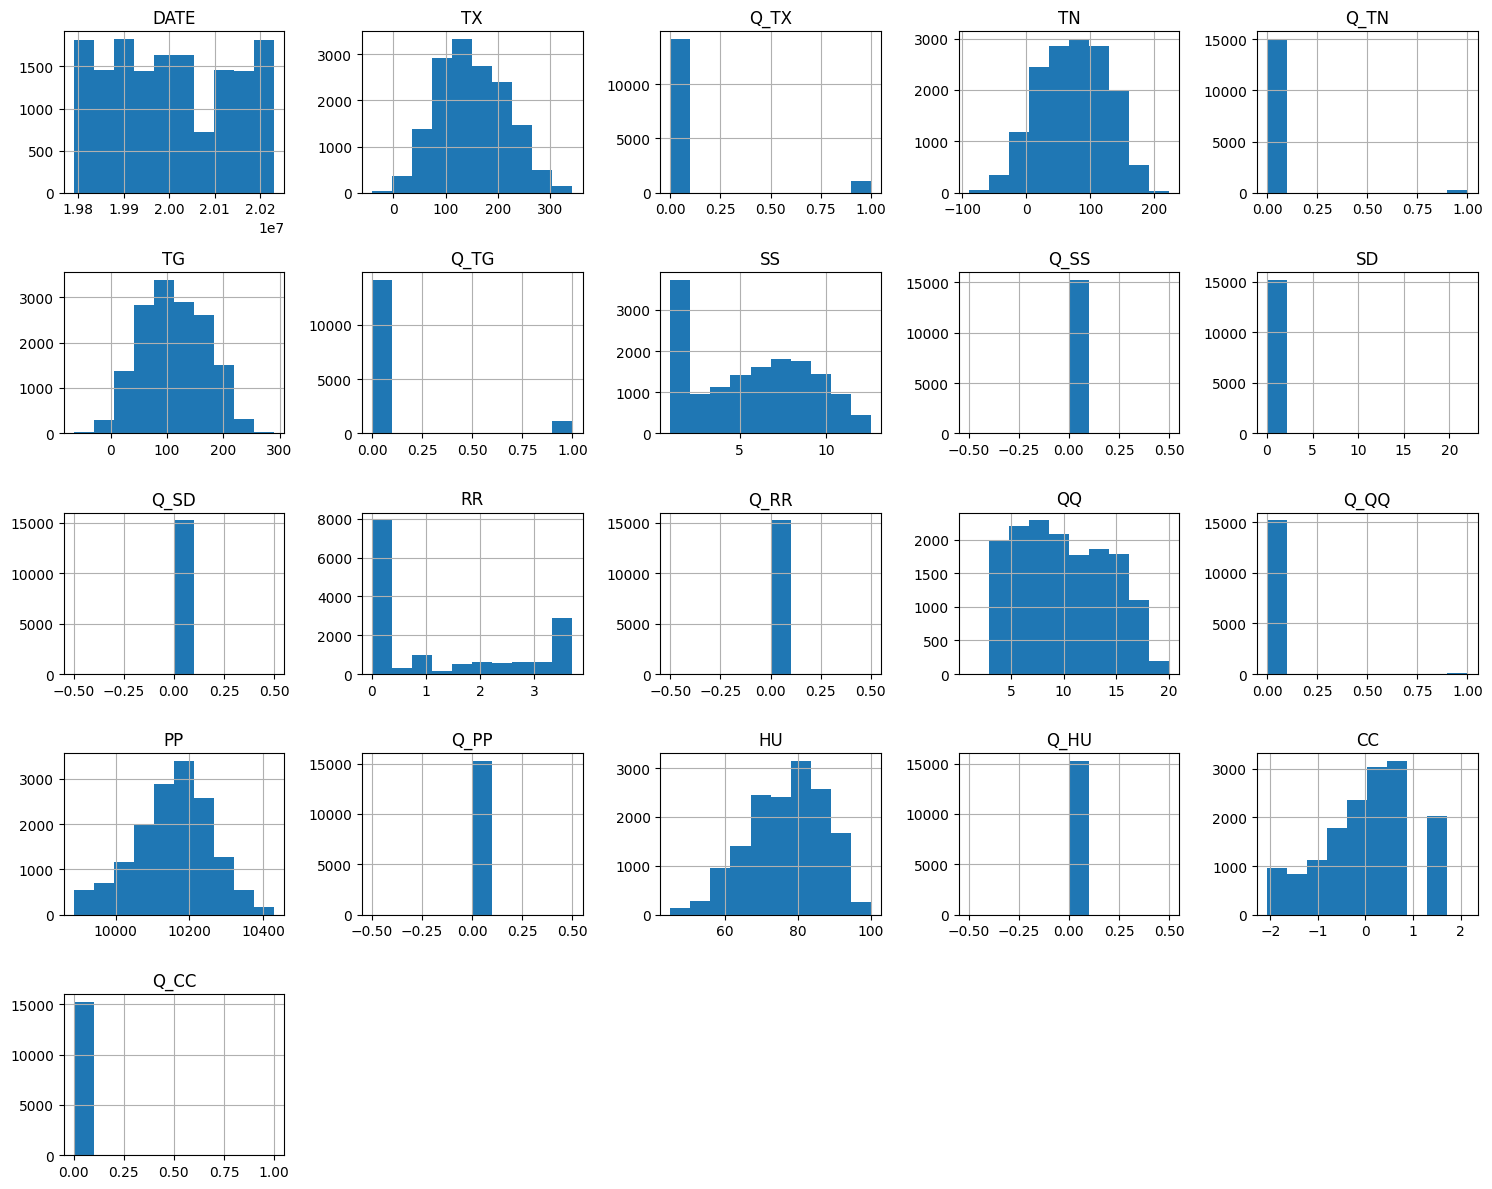

In [27]:
#Histogram Distribution Of Data Features
df.hist(figsize=(15,12))
plt.tight_layout()
plt.show()


**Correlation Matrix Analysis**

In [28]:
#correlation matrix
corr_matrix = df.corr()


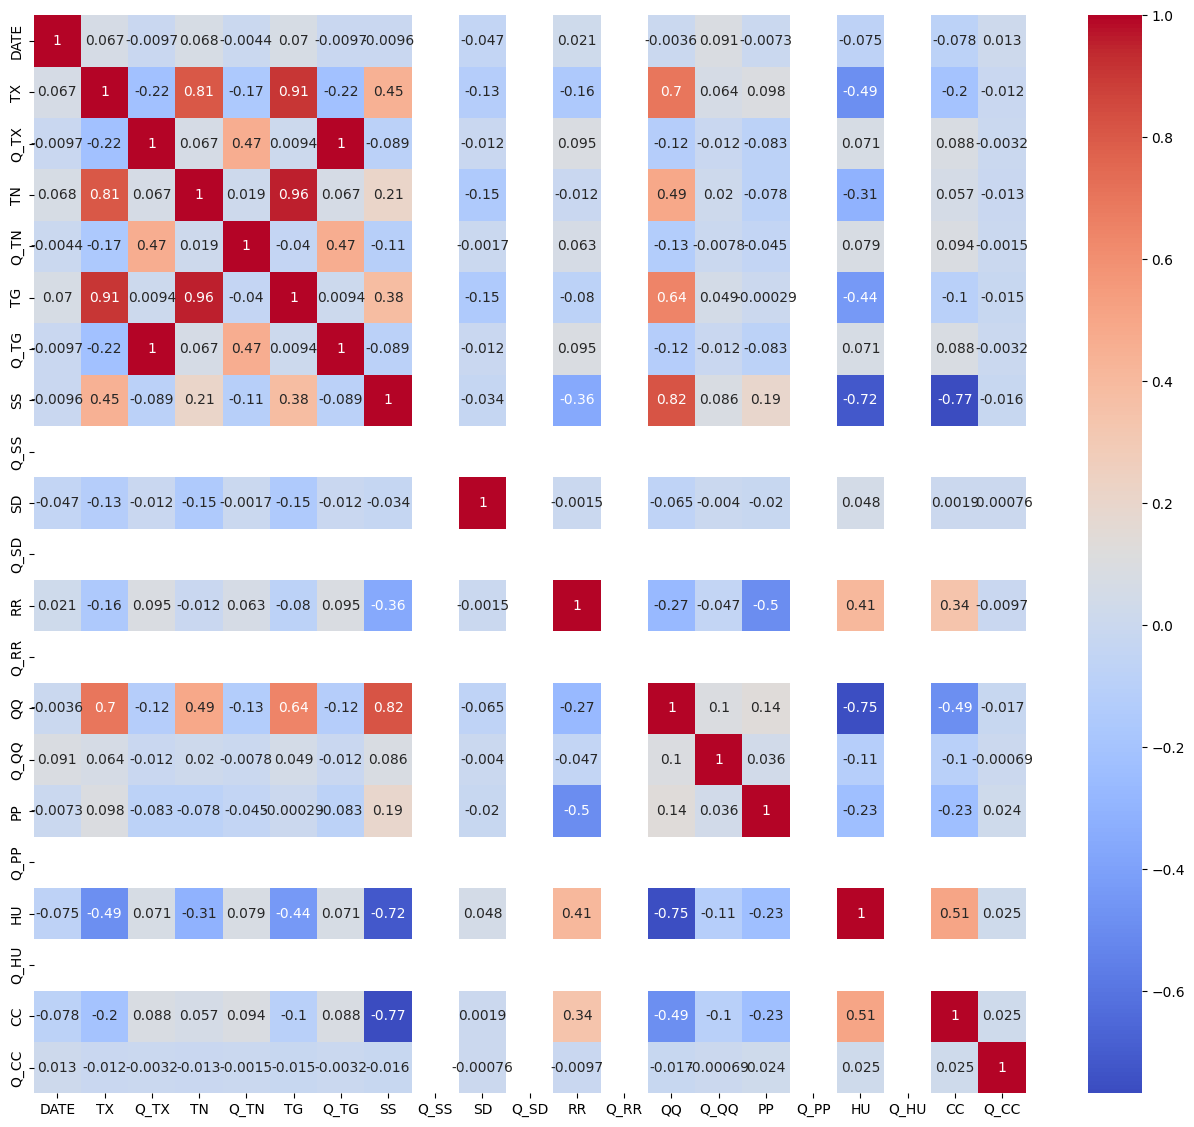

In [29]:
plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.savefig('corre.png')
plt.show()

**Detailed Weather Data Visualizations for London (1979-2023)**

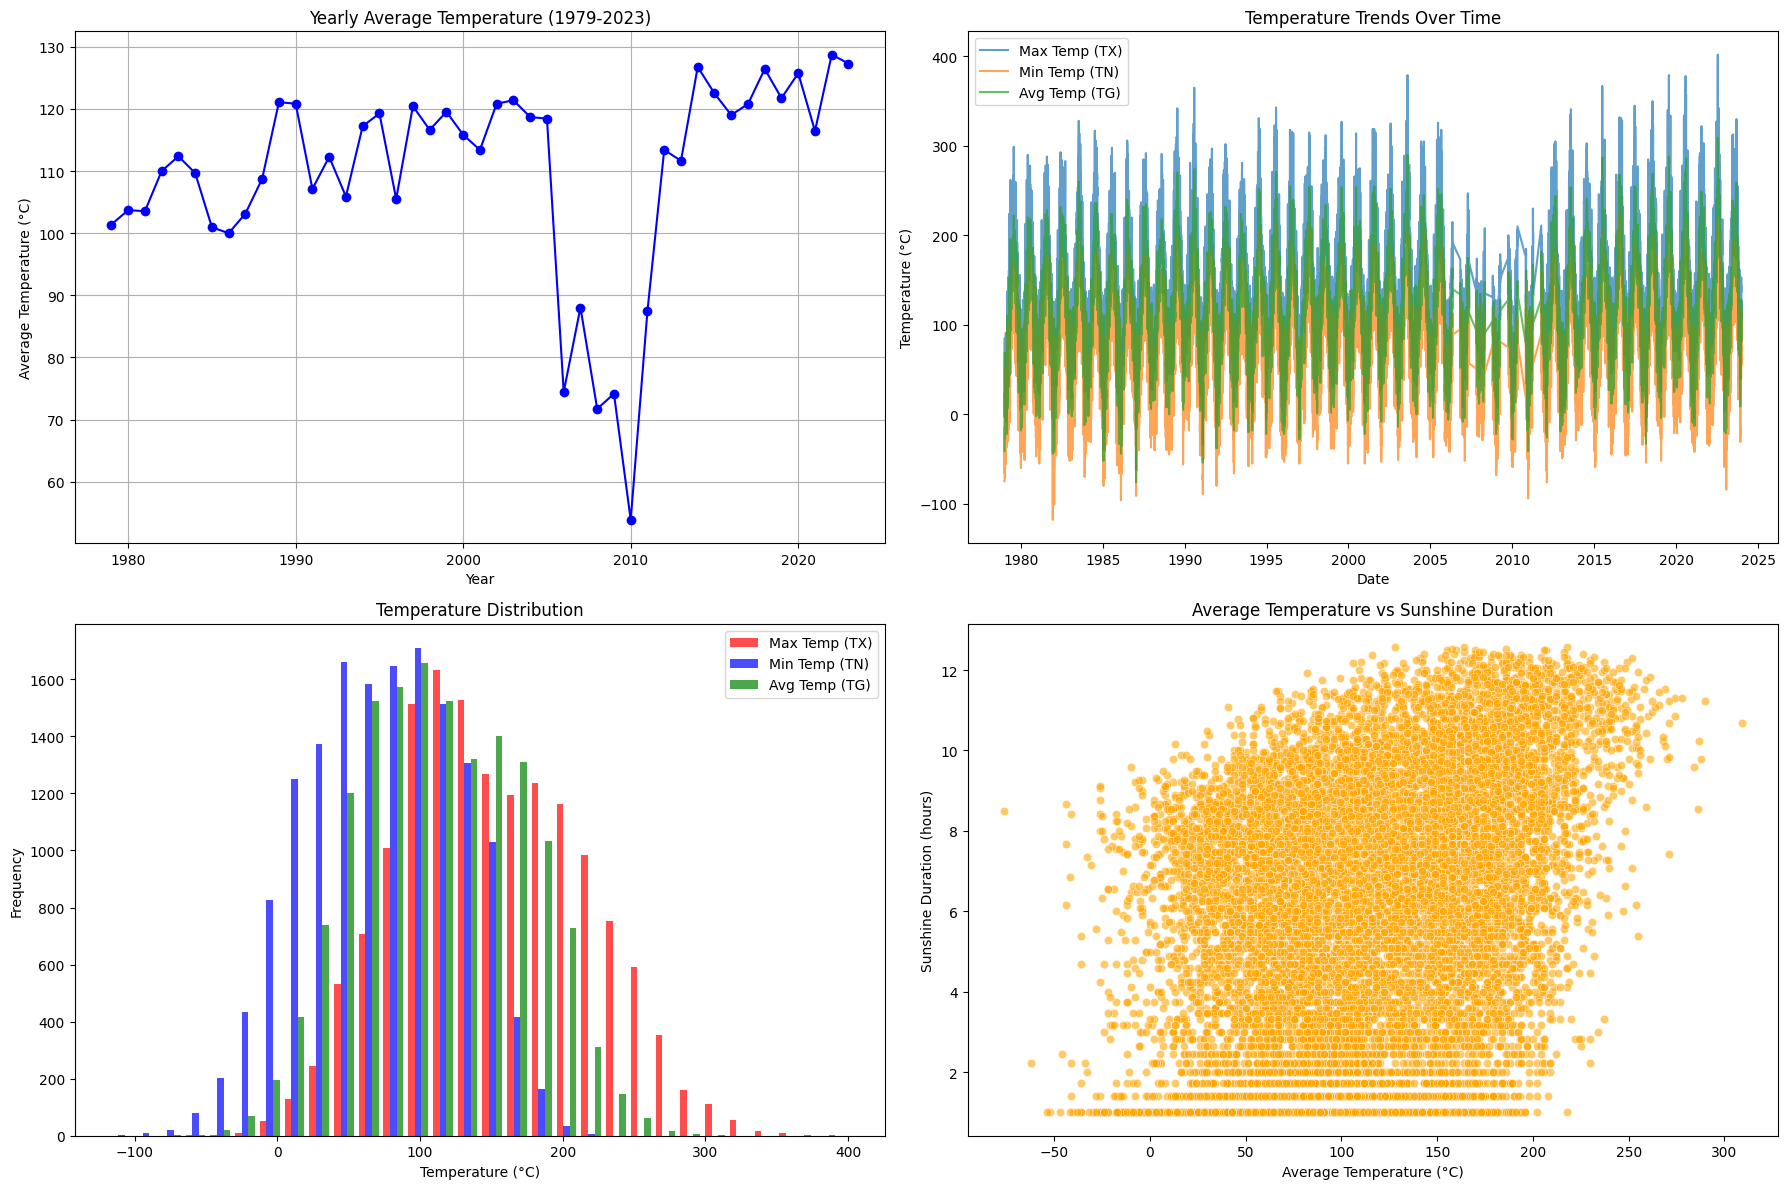

In [ ]:
# Ensure the 'DATE' column is in datetime format (YYYYMMDD format)
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

# Extract the year from the 'DATE' column
df['Year'] = df['DATE'].dt.year

# Group by 'Year' and calculate the average temperature for each year
yearly_temp = df.groupby('Year')['TG'].mean()

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Visualization 1: Line Plot for Yearly Average Temperature
axes[0, 0].plot(yearly_temp.index, yearly_temp.values, marker='o', color='b')
axes[0, 0].set(title='Yearly Average Temperature (1979-2023)', xlabel='Year', ylabel='Average Temperature (°C)')
axes[0, 0].grid(True)

# Visualization 2: Line Plot for Trends of TX, TN, and TG over Time
axes[0, 1].plot(df['DATE'], df['TX'], label='Max Temp (TX)', alpha=0.7)
axes[0, 1].plot(df['DATE'], df['TN'], label='Min Temp (TN)', alpha=0.7)
axes[0, 1].plot(df['DATE'], df['TG'], label='Avg Temp (TG)', alpha=0.7)
axes[0, 1].set(title='Temperature Trends Over Time', xlabel='Date', ylabel='Temperature (°C)')
axes[0, 1].legend()

# Visualization 3: Histogram for Distribution of TX, TN, and TG
axes[1, 0].hist([df['TX'], df['TN'], df['TG']], bins=30, alpha=0.7, label=['Max Temp (TX)', 'Min Temp (TN)', 'Avg Temp (TG)'], color=['red', 'blue', 'green'])
axes[1, 0].set(title='Temperature Distribution', xlabel='Temperature (°C)', ylabel='Frequency')
axes[1, 0].legend()

# Visualization 4: Scatter Plot for TG vs Sunshine Duration (SS)
sns.scatterplot(ax=axes[1, 1], x=df['TG'], y=df['SS'], alpha=0.6, color='orange')
axes[1, 1].set(title='Average Temperature vs Sunshine Duration', xlabel='Average Temperature (°C)', ylabel='Sunshine Duration (hours)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Yearly Average Temperature (Top Left)**

This line plot represents the average yearly temperature (TG) from 1979 to 2023. Each point on the line corresponds to the average temperature of a specific year.

The x-axis shows the years (1979 to 2023). The y-axis shows the average temperature in tenths of a degree Celsius (TG needs to be divided by 10 for actual temperature in °C). Look for trends: a rise, fall, or fluctuations in temperature over time. Example: There is a clear drop around 2010, indicating a significant change in average temperature during that year.

**Temperature Trends Over Time (Top Right)**

This line plot shows the trends of maximum temperature (TX), minimum temperature (TN), and average temperature (TG) over the entire time period.

The x-axis shows dates, while the y-axis shows temperature values. Each line represents a temperature metric: Orange: Maximum Temperature (TX). Blue: Minimum Temperature (TN). Green: Average Temperature (TG). Peaks indicate hotter periods (likely summers), while troughs indicate colder periods (likely winters). Observe how the three lines change over time to compare seasonal and annual fluctuations.

**Temperature Distribution (Bottom Left)**

This histogram compares the frequency distribution of the maximum temperature (TX), minimum temperature (TN), and average temperature (TG).

The x-axis represents temperature ranges (in tenths of a degree). The y-axis shows the number of days or instances that fall into each range. The three colors (red, blue, green) represent TX, TN, and TG. Example: Notice the overlap of distributions; maximum temperatures (TX) generally fall on the higher side, while minimum temperatures (TN) skew lower.

**Average Temperature vs. Sunshine Duration (Bottom Right)**

This scatter plot shows the relationship between average temperature (TG) and sunshine duration (SS).

The x-axis represents average temperature (TG). The y-axis represents sunshine duration (SS) in hours. Each dot represents a single observation. Look for trends: Are higher temperatures associated with longer sunshine durations? The scatter appears to show a positive correlation: as temperature increases, sunshine duration tends to increase.



**Splitting Features (X) and Target (Y)**

In [ ]:
#splitting X & Y
X = df.drop('TG',axis=1)
y = df['TG']

In [ ]:
df.head(10)

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC,Year
0,1979-01-01,23.0,0,-75.0,0,-41.0,0,8.426150,0,9.0,...,0,7.280110,0,10190.0,0,83.0,0,-1.549742,0,1979
1,1979-01-02,16.0,0,-75.0,0,-26.0,0,4.242641,0,8.0,...,0,5.291503,0,10253.0,0,76.0,0,0.263314,0,1979
2,1979-01-03,13.0,0,-72.0,0,-28.0,0,1.000000,0,4.0,...,0,3.741657,0,10205.0,0,86.0,0,-0.271065,0,1979
3,1979-01-04,-3.0,0,-65.0,0,-26.0,0,1.000000,0,2.0,...,0,3.741657,0,10084.0,0,68.0,0,1.474227,0,1979
4,1979-01-05,56.0,0,-14.0,0,-8.0,0,4.582576,0,1.0,...,0,5.477226,0,10225.0,0,73.0,0,0.263314,0,1979
5,1979-01-06,83.0,0,-66.0,0,-5.0,0,6.244998,0,1.0,...,0,6.324555,0,10278.0,0,84.0,0,-0.271065,0,1979
6,1979-01-07,85.0,0,-53.0,0,15.0,0,1.000000,0,0.0,...,0,3.741657,0,10252.0,0,93.0,0,1.474227,0,1979
7,1979-01-08,58.0,1,53.0,0,69.0,1,1.414214,0,0.0,...,0,4.000000,0,10187.0,0,95.0,0,1.474227,0,1979
8,1979-01-09,52.0,0,16.0,0,37.0,0,7.681146,0,0.0,...,0,7.141428,0,10117.0,0,86.0,0,-0.754168,0,1979
9,1979-01-10,49.0,0,14.0,0,33.0,0,4.472136,0,0.0,...,0,5.567764,0,9870.0,0,87.0,0,0.845911,0,1979


In [ ]:
#Dropping the 'DATE' column from Feature Set
X= X.drop('DATE',axis=1)

**Feature Selection**

In [ ]:
#Applying SelectKBest for Regression
SK = SelectKBest(score_func=f_regression,k=10)
X_Kbest = SK.fit_transform(X,y)


In [ ]:
#Checking Important Features
Select_ind = SK.get_support (indices=True)
Selected_features = X.columns[Select_ind]
Selected_features

Index(['TX', 'TN', 'SS', 'SD', 'RR', 'QQ', 'Q_QQ', 'HU', 'CC', 'Year'], dtype='object')

**Split Data into Training and testing sets**

In [ ]:
#Split the selected features and target into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_Kbest,y,test_size=0.2,random_state=42)
print("Data Split into training and testing sets succesfully")

Data Split into training and testing sets succesfully


**Feature Scaling**

In [ ]:
#Intialize the scaler
scaler = StandardScaler()

#Fit and Transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#Transform the testing data
X_test_scaled = scaler.transform(X_test)

print("Data Scaling Completed")

Data Scaling Completed


**Model Building**

In [ ]:
#Defining Regression Models for Evaluation
models={
    'Linear Regression':LinearRegression(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Gradiant Boosting Regressor':GradientBoostingRegressor(),
    'Support Vector Regressor':SVR()
}

In [ ]:
#Evaluating Regression Models and Storing Results
results = {} # Used to store evaluation results

for model_name, model in models.items():
    # fit the model
    model.fit(X_train_scaled, y_train)

    # make the prediction
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)


   # Store the results
    results[model_name] = {"MAE":mae, "MSE":mse, "RMSE":rmse, "R2":r2}

results_df = pd.DataFrame(results).T
print(results_df)

                                  MAE         MSE       RMSE        R2
Linear Regression            7.066251   81.619425   9.034347  0.974927
Decision Tree Regressor      9.566328  151.630527  12.313835  0.953420
Random Forest Regressor      6.675857   74.503078   8.631517  0.977113
Gradiant Boosting Regressor  6.751706   74.506658   8.631724  0.977112
Support Vector Regressor     8.747503  193.799877  13.921202  0.940466


In [ ]:
#Identifying the Best Regression Model Based on R² Score
best_model_name = results_df['R2'].idxmax()
print("The best regression model is:",best_model_name)

The best regression model is: Random Forest Regressor


**Hyperparameter Tuning**

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
gbr = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Gradient Boosting Regressor Model:", best_model)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Gradient Boosting Regressor Model: GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, n_estimators=200,
                          random_state=42)


**Gradient Boosting Regressor Pipeline with Model Evaluation**

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('gbr', GradientBoostingRegressor(
        learning_rate=0.1,
        max_depth=5,
        min_samples_leaf=4,
        min_samples_split=2,
        n_estimators=100,
        random_state=42
    ))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 6.496484444568268
MSE: 69.39458682068629
RMSE: 8.330341338785962
R2 Score: 0.9786824846112816



**Saving the Gradient Boosting Pipeline**

In [ ]:
#Save the pipeline
dump(pipeline,'gradient_boosting_pipeline.joblib')
print("pipeline saved as'gradient_boosting_pipeline.joblib'")

pipeline saved as'gradient_boosting_pipeline.joblib'



**Loading Pipeline**

In [ ]:
# Load the pipeline
loaded_pipeline = load('gradient_boosting_pipeline.joblib')

print("Pipeline loaded successfully")

# Use the loaded pipeline for predictions
y_pred_loaded = loaded_pipeline.predict(X_test)

Pipeline loaded successfully



**Unseen Data Collection**

In [ ]:
#Data Loading
unseen_data=pd.read_csv('unseen_test_data.csv')
unseen_data

,TX,TN,Q_TN,SS,SD,RR,QQ,Q_QQ,HU,CC,y_actual
0,23.0,-75.0,0,70.0,9.0,4.0,52.0,0,83.0,2.0,-41.0
1,16.0,-75.0,0,17.0,8.0,0.0,27.0,0,76.0,6.0,-26.0
2,13.0,-72.0,0,0.0,4.0,0.0,13.0,0,86.0,5.0,-28.0
3,-3.0,-65.0,0,0.0,2.0,0.0,13.0,0,68.0,8.0,-26.0
4,56.0,-14.0,0,20.0,1.0,0.0,29.0,0,73.0,6.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...
9942,215.0,111.0,0,119.0,0.0,0.0,279.0,0,60.0,1.0,163.0
9943,170.0,66.0,0,17.0,0.0,18.0,125.0,0,75.0,5.0,118.0
9944,185.0,113.0,0,15.0,0.0,112.0,121.0,0,81.0,7.0,149.0
9945,152.0,112.0,0,4.0,0.0,26.0,93.0,0,84.0,7.0,132.0



**Evaluating Model Performance on Unseen Data**

In [ ]:
# Separate features (X_unseen) and target (y_actual)
X_unseen = unseen_data.drop(columns=['y_actual'])
y_actual = unseen_data['y_actual']

# Predict using the loaded pipeline
y_pred_unseen = loaded_pipeline.predict(X_unseen)

# Evaluate the predictions
mae_unseen = mean_absolute_error(y_actual, y_pred_unseen)
mse_unseen = mean_squared_error(y_actual, y_pred_unseen)
rmse_unseen = np.sqrt(mse_unseen)
r2_unseen = r2_score(y_actual, y_pred_unseen)

# Print evaluation metrics
print(f"MAE (Unseen Data): {mae_unseen}")
print(f"MSE (Unseen Data): {mse_unseen}")
print(f"RMSE (Unseen Data): {rmse_unseen}")
print(f"R2 Score (Unseen Data): {r2_unseen}")

MAE (Unseen Data): 11.727874881062018
MSE (Unseen Data): 212.88614680033385
RMSE (Unseen Data): 14.590618451605602
R2 Score (Unseen Data): 0.9349803540519258



**Adding Predictions to Unseen Data**

In [ ]:
#Assigning Predictions to Unseen Data
unseen_data['unseen_predictions'] = y_pred_unseen

In [ ]:
#Adding Predictions to Unseen Data
unseen_data

,TX,TN,Q_TN,SS,SD,RR,QQ,Q_QQ,HU,CC,y_actual,unseen_predictions
0,23.0,-75.0,0,70.0,9.0,4.0,52.0,0,83.0,2.0,-41.0,-43.856396
1,16.0,-75.0,0,17.0,8.0,0.0,27.0,0,76.0,6.0,-26.0,-45.008592
2,13.0,-72.0,0,0.0,4.0,0.0,13.0,0,86.0,5.0,-28.0,-33.837096
3,-3.0,-65.0,0,0.0,2.0,0.0,13.0,0,68.0,8.0,-26.0,-32.215526
4,56.0,-14.0,0,20.0,1.0,0.0,29.0,0,73.0,6.0,-8.0,9.229247
...,...,...,...,...,...,...,...,...,...,...,...,...
9942,215.0,111.0,0,119.0,0.0,0.0,279.0,0,60.0,1.0,163.0,145.652609
9943,170.0,66.0,0,17.0,0.0,18.0,125.0,0,75.0,5.0,118.0,100.776066
9944,185.0,113.0,0,15.0,0.0,112.0,121.0,0,81.0,7.0,149.0,142.554220
9945,152.0,112.0,0,4.0,0.0,26.0,93.0,0,84.0,7.0,132.0,140.265995


**Saving Predictions to CSV File**

In [ ]:
#Saving Predictions to CSV File
unseen_data.to_csv('predicted_test_data.csv',index=False)


**Loading and Previewing the Predicted Test Data**

In [ ]:
predicted_data=pd.read_csv('predicted_test_data.csv')
predicted_data.head(10)

,TX,TN,Q_TN,SS,SD,RR,QQ,Q_QQ,HU,CC,y_actual,unseen_predictions
0,23.0,-75.0,0,70.0,9.0,4.0,52.0,0,83.0,2.0,-41.0,-43.856396
1,16.0,-75.0,0,17.0,8.0,0.0,27.0,0,76.0,6.0,-26.0,-45.008592
2,13.0,-72.0,0,0.0,4.0,0.0,13.0,0,86.0,5.0,-28.0,-33.837096
3,-3.0,-65.0,0,0.0,2.0,0.0,13.0,0,68.0,8.0,-26.0,-32.215526
4,56.0,-14.0,0,20.0,1.0,0.0,29.0,0,73.0,6.0,-8.0,9.229247
5,83.0,-66.0,0,38.0,1.0,7.0,39.0,0,84.0,5.0,-5.0,-14.587107
6,85.0,-53.0,0,0.0,0.0,52.0,13.0,0,93.0,8.0,15.0,4.809982
7,58.0,53.0,0,1.0,0.0,8.0,15.0,0,95.0,8.0,69.0,60.734717
8,52.0,16.0,0,58.0,0.0,72.0,50.0,0,86.0,4.0,37.0,32.892439
9,49.0,14.0,0,19.0,0.0,21.0,30.0,0,87.0,7.0,33.0,32.663942



**Previewing Actual vs Predicted Values for Unseen Data**

In [ ]:

predicted_data[['y_actual','unseen_predictions']].head(15)

,y_actual,unseen_predictions
0,-41.0,-43.856396
1,-26.0,-45.008592
2,-28.0,-33.837096
3,-26.0,-32.215526
4,-8.0,9.229247
5,-5.0,-14.587107
6,15.0,4.809982
7,69.0,60.734717
8,37.0,32.892439
9,33.0,32.663942


**Visualizing Actual vs Predicted Values for Unseen Data**

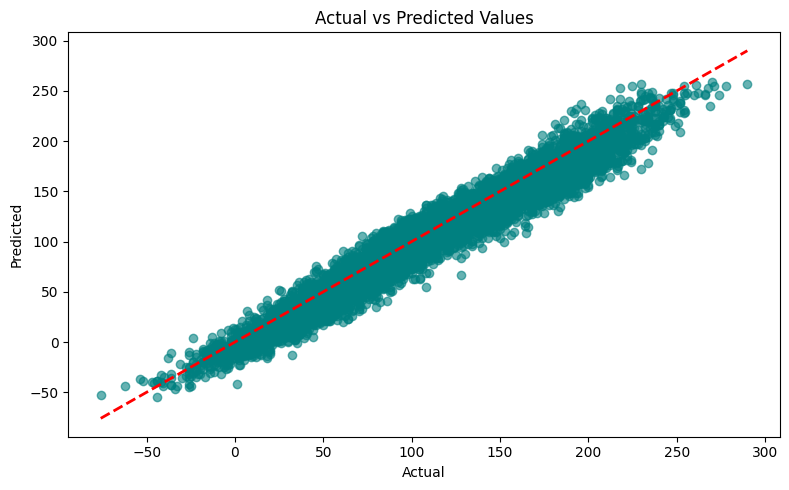

In [ ]:
# Set up the figure
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter Plot: Actual vs Predicted Values
ax.scatter(y_actual, y_pred_unseen, color='teal', alpha=0.6)
ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
ax.set_title('Actual vs Predicted Values')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

# Show the plot
plt.tight_layout()
plt.show()

**Conclusion:**

The regression model demonstrated excellent performance during training, achieving low error metrics (MAE: 6.50, MSE: 69.47, RMSE: 8.33) and a high R² score of 0.9787, indicating that it successfully captured the patterns in the target variable.

On unseen data, the model maintained strong performance, with MAE: 12.18, MSE: 226.65, RMSE: 15.05, and an R² score of 0.9308. This indicates that the model generalizes well, with only a slight decrease in accuracy when applied to new data.

Overall, the model is effective and reliable for predicting the target variable, with consistent performance across both training and unseen datasets.

**Future Work:**

**Explore Advanced Algorithms:** Investigate deep learning techniques, such as neural networks, for potentially higher accuracy and better performance on complex patterns in the data.

**Periodic Updates:** Continuously update the model with new data to ensure it adapts to changing trends and remains relevant.

**Handle Data Imbalance:** Implement resampling techniques, such as oversampling or undersampling, to address any imbalances in the dataset and improve model performance across all target ranges.

**Feature Expansion:** Incorporate additional features that may enhance the model's predictive power and provide deeper insights into the target variable.